# Network Visualization with NetworkX

## 1. Visualization technique description
The visualization technique that I am going to demonstrate in this notebook is network visualization.

First, I wanted to cover a couple of concepts that I am using in this notebook. Network comprises of edges and nodes. Nodes are separate entities, for example, people in a social network. Edges are the connection points between the nodes, for example, relationship between people in a social network. Visual representation of edges and nodes is a network visualization. Network visualization has additional attributes that can be plotted, for example, the weight or strength of relationships. However, the two mandatory components are always nodes and edges.  

Network visualization is an extremely powerful technique that has many applications. One of the most common examples available online is the social network visualization. For example, the users are plotted as nodes and their Facebook friends or LinkedIn connections are plotted as edges in a visualization of a social media network. Another common application of network visualization is in infectious disease studies. Such visualization can showcase the spread of the virus in communities. Network visualization is also a popular technique in the corporate world. For example, in an online retail supply chain customers and distribution centers can be plotted as nodes, and shipments as edges. The distribution plot can show if the orders are being delivered from the closest distribution centers. 

While network visualization is a powerful technique, there is always needs to be caution around plotting graphs with too many edges and nodes. Things can get messy and difficult to interpret if we have too much data on our chart. Couple of ways to avoid this is to aggregate the data to a certain level or filter out some of the data depending on the applicable use case. 

I will be using flight data to show how we can create network visualization plots.  

## 2. Visualization library overview
The library that I am using is NetworkX. 

There are many commercial software products that could help visualize a network. However, I was interested in learning what libraries are available in Python to achieve such task. I discovered that there are many Python packages such as PyVis, NetworkX, Ploty to name a few. All choices of libraries seemed solid and I would be able to achieve the type of plot I was looking for. I decided to use NetworkX as it has nice formatting capabilities and allows to make network visualization easier to understand.

NetworkX was created 15 years ago by Aric Hagberg, Pieter Swart and Dan Schult. It is an open-source library and has had many releases since its original release in April 2005. It can be installed using $ pip install networkx 

NetworkX requires two key data elements - nodes and edges. Nodes can be any hashable objects, such as text, images, XML objects, etc. There are several ways to add nodes and edges to the network graph, which includes adding nodes and edges one-by-one, providing an iterable container, or passing a list. The nice thing about NetworkX is that attributes of nodes and edges can be easily defined. Each node and edge can hold attributes in associated attribute dictionary. By default, such dictionaries are empty, but we can pass our values into the dictionaries and use them in the visualizations. NetworkX also has some more advanced capabilities, such as interactivity. 


## 3. Demonstration 
Now we are getting to the meat and potatoes of the tasks at hand. I am using 2019 US flight data. This is publicly available dataset and can be obtained from the Bureau of Transportation Statistics website - https://www.transtats.bts.gov/. I am using 2019 data to see more typical flight patterns in air travel before Covid-19 impact. 

First, we are going to read in the monthly data and create an annual data frame (Unfortunately, there is no option to download an annual dataset from the Bureau of Transportation Statistics website. I checked...) 

Then, we are going to create a couple of additional fields to assist in our analysis: origin-destination pairs and flight frequency based on origin-destination pairs. For example, the frequency is going to tell us how many flights were between ERW(Newark) and ORD(Chicago) in 2019.


In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
%matplotlib inline

#read monthly data 
data_Jan2019 = pd.read_csv("Jan_2019.csv")
data_Feb2019 = pd.read_csv("Feb_2019.csv")
data_Mar2019 = pd.read_csv("Mar_2019.csv")
data_Apr2019 = pd.read_csv("Apr_2019.csv")
data_May2019 = pd.read_csv("May_2019.csv")
data_Jun2019 = pd.read_csv("Jun_2019.csv")
data_Jul2019 = pd.read_csv("Jul_2019.csv")
data_Aug2019 = pd.read_csv("Aug_2019.csv")
data_Sep2019 = pd.read_csv("Sep_2019.csv")
data_Oct2019 = pd.read_csv("Oct_2019.csv")
data_Nov2019 = pd.read_csv("Nov_2019.csv")
data_Dec2019 = pd.read_csv("Dec_2019.csv")

#create annual dataframe
df=data_Jan2019
df = pd.concat([data_Jan2019, data_Feb2019, data_Mar2019, data_Apr2019, data_May2019, data_Jun2019,
                  data_Jul2019, data_Aug2019,data_Sep2019, data_Oct2019, data_Nov2019, data_Dec2019])

#create origin-destination pairs and calculate frequency of flights for origin-destination pairs
df['Origin-Destination'] = (df['ORIGIN_AIRPORT_ID']).astype(str) +"_" + (df['DEST_AIRPORT_ID']).astype(str)
data_edges = df.groupby(['Origin-Destination','ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID','OP_UNIQUE_CARRIER']).size()
data_edges = pd.DataFrame(data_edges.reset_index())
data_edges.columns= ['O-D', 'Origin', 'Destination','Carrier','Freq']

#the flight frequency data is not normally distributed . It is more of an exponential distribution.
#if we do not take log of the data, the high frequency origin-destination pairs will dominate visualization in size and color saturation
data_edges['Freq'] = np.log10(data_edges['Freq'])


We have our dataframe that has nodes - origin and destination airports, and edges - connection between origin and destination airports. As discussed above, nodes and edges are the two required elements to create a network visualization. So we can try and create a network graph! 

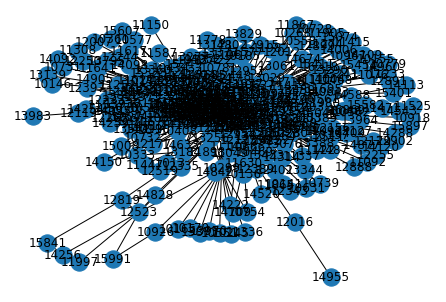

In [2]:
#We create a nx.Graph() object and add edges to the graph. We are not specifically calling out nodes in the function, which is ok
#since NetworkX will assume that the start and end of our edges are the nodes 
G=nx.Graph()
for _, edge in data_edges.iterrows():
    G.add_edge(edge['Origin'], edge['Destination'])

nx.draw(G, with_labels=True)
plt.show()

Beautiful. I think we can drive a lot of insights from this graph and our work is done! Just kidding... We are actually going to do some more data clean up before we proceed with network visualization. We can kind of see that airport labels are five-digit codes and not three-letter codes that we are more used to seeing on our boarding passes. We are going to load additional datasets to change the five-digit code to a three-letter code.

In [3]:
#let's do some more data cleaning and add somewhat recognizable labels. 
#In order to do this, we will need to import two additional data files. 

#read labels from two supporting files. the final_label file contains five-digit codes, three-letter codes and airport names
labels = pd.read_csv('L_AIRPORT_ID.csv')
labels2 = pd.read_csv('L_AIRPORT.csv')
final_label = pd.merge(labels, labels2, on='Description')

#merge final_label with the flight dataset for Destination airports
data_edges_labels=pd.merge(data_edges, final_label, left_on='Origin', right_on='Code_x')
data_edges_labels=data_edges_labels[['Destination','Freq','Code_y','Carrier']]
data_edges_labels2 = pd.merge(data_edges_labels, final_label, left_on='Destination',right_on='Code_x')

#merge final_label with the flight dataset for Origin airports
data_edges_labels2=data_edges_labels2[['Freq','Code_y_x','Code_y_y','Carrier']]
data_edges_labels2.columns=['Freq','Origin','Destination','Carrier']
data_edges=data_edges_labels2
print(data_edges)


           Freq Origin Destination Carrier
0      2.800717    ABE         ATL      9E
1      2.513218    ABE         ATL      DL
2      2.943495    ABQ         ATL      DL
3      3.002166    ABY         ATL      OO
4      2.245513    ACY         ATL      NK
...         ...    ...         ...     ...
13670  2.882525    SLC         CDC      OO
13671  2.829947    SLC         EKO      OO
13672  3.037426    SLC         PIH      OO
13673  3.017033    SLC         TWF      OO
13674  2.421604    SLC         WYS      OO

[13675 rows x 4 columns]


We now have airport labels as three-letter codes and this should allow for easier interpretation of the network graphs. As a next step, we can start cleaning up the edges in our network graph to make them more meaningful. We can define flight frequency as weight for our edges. The weight attribute can be used to color the edges and also set the thickness of the lines. As the result, the graph will have lighter and thinner edges if the flight frequency between two airports is low. 

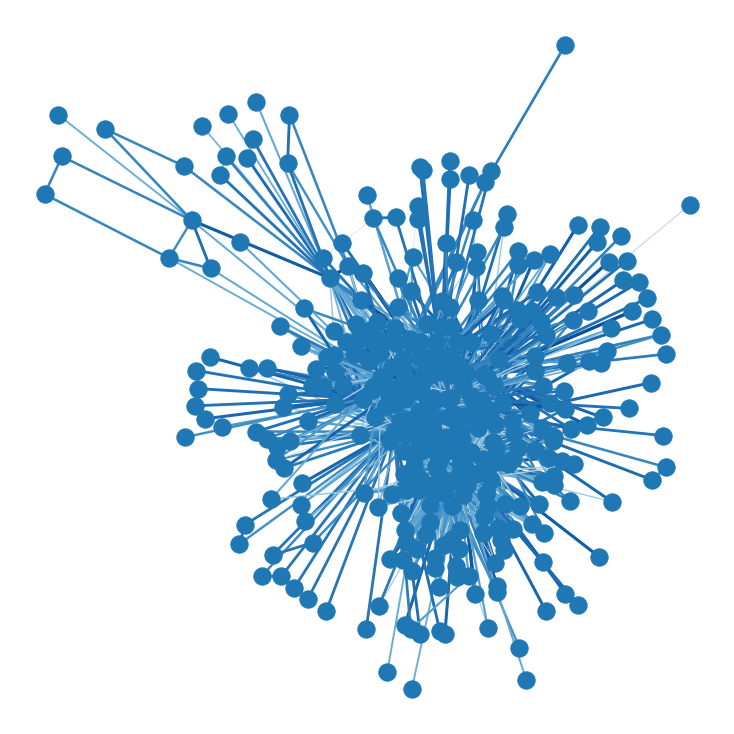

In [5]:
#create nx.Graph() object and set figure size 
G = nx.Graph()
plt.figure(figsize=(10,10)) 

#add edges to the nx.Graph() object
for _, edge in data_edges.iterrows():
    G.add_edge(edge['Origin'], edge['Destination'], weight=edge['Freq'])

#create a list of weights that we can pass into the draw function 
edges = G.edges()
weights = [G[origin][destination]['weight'] for origin,destination in edges]

#add edge color and weight to the plot. Use color map Blues
nx.draw(G,  edges=edges,  width=weights, edge_color=weights, edge_cmap=plt.cm.Blues)

Ok, still a mess. Next, we will clean up our nodes and make them a little more meaningful as well. I calculated the number of outbound flights from each airport and assigned it to the size and color of each node. In a similar way as with edges, we are going to see lighter colored smaller nodes for airports with a low number of outbound flights. Of course, we are going to add back labels to the nodes as well. Also, given the volume of the data that we have, I am going to filter out some of the edges with low flight frequency.

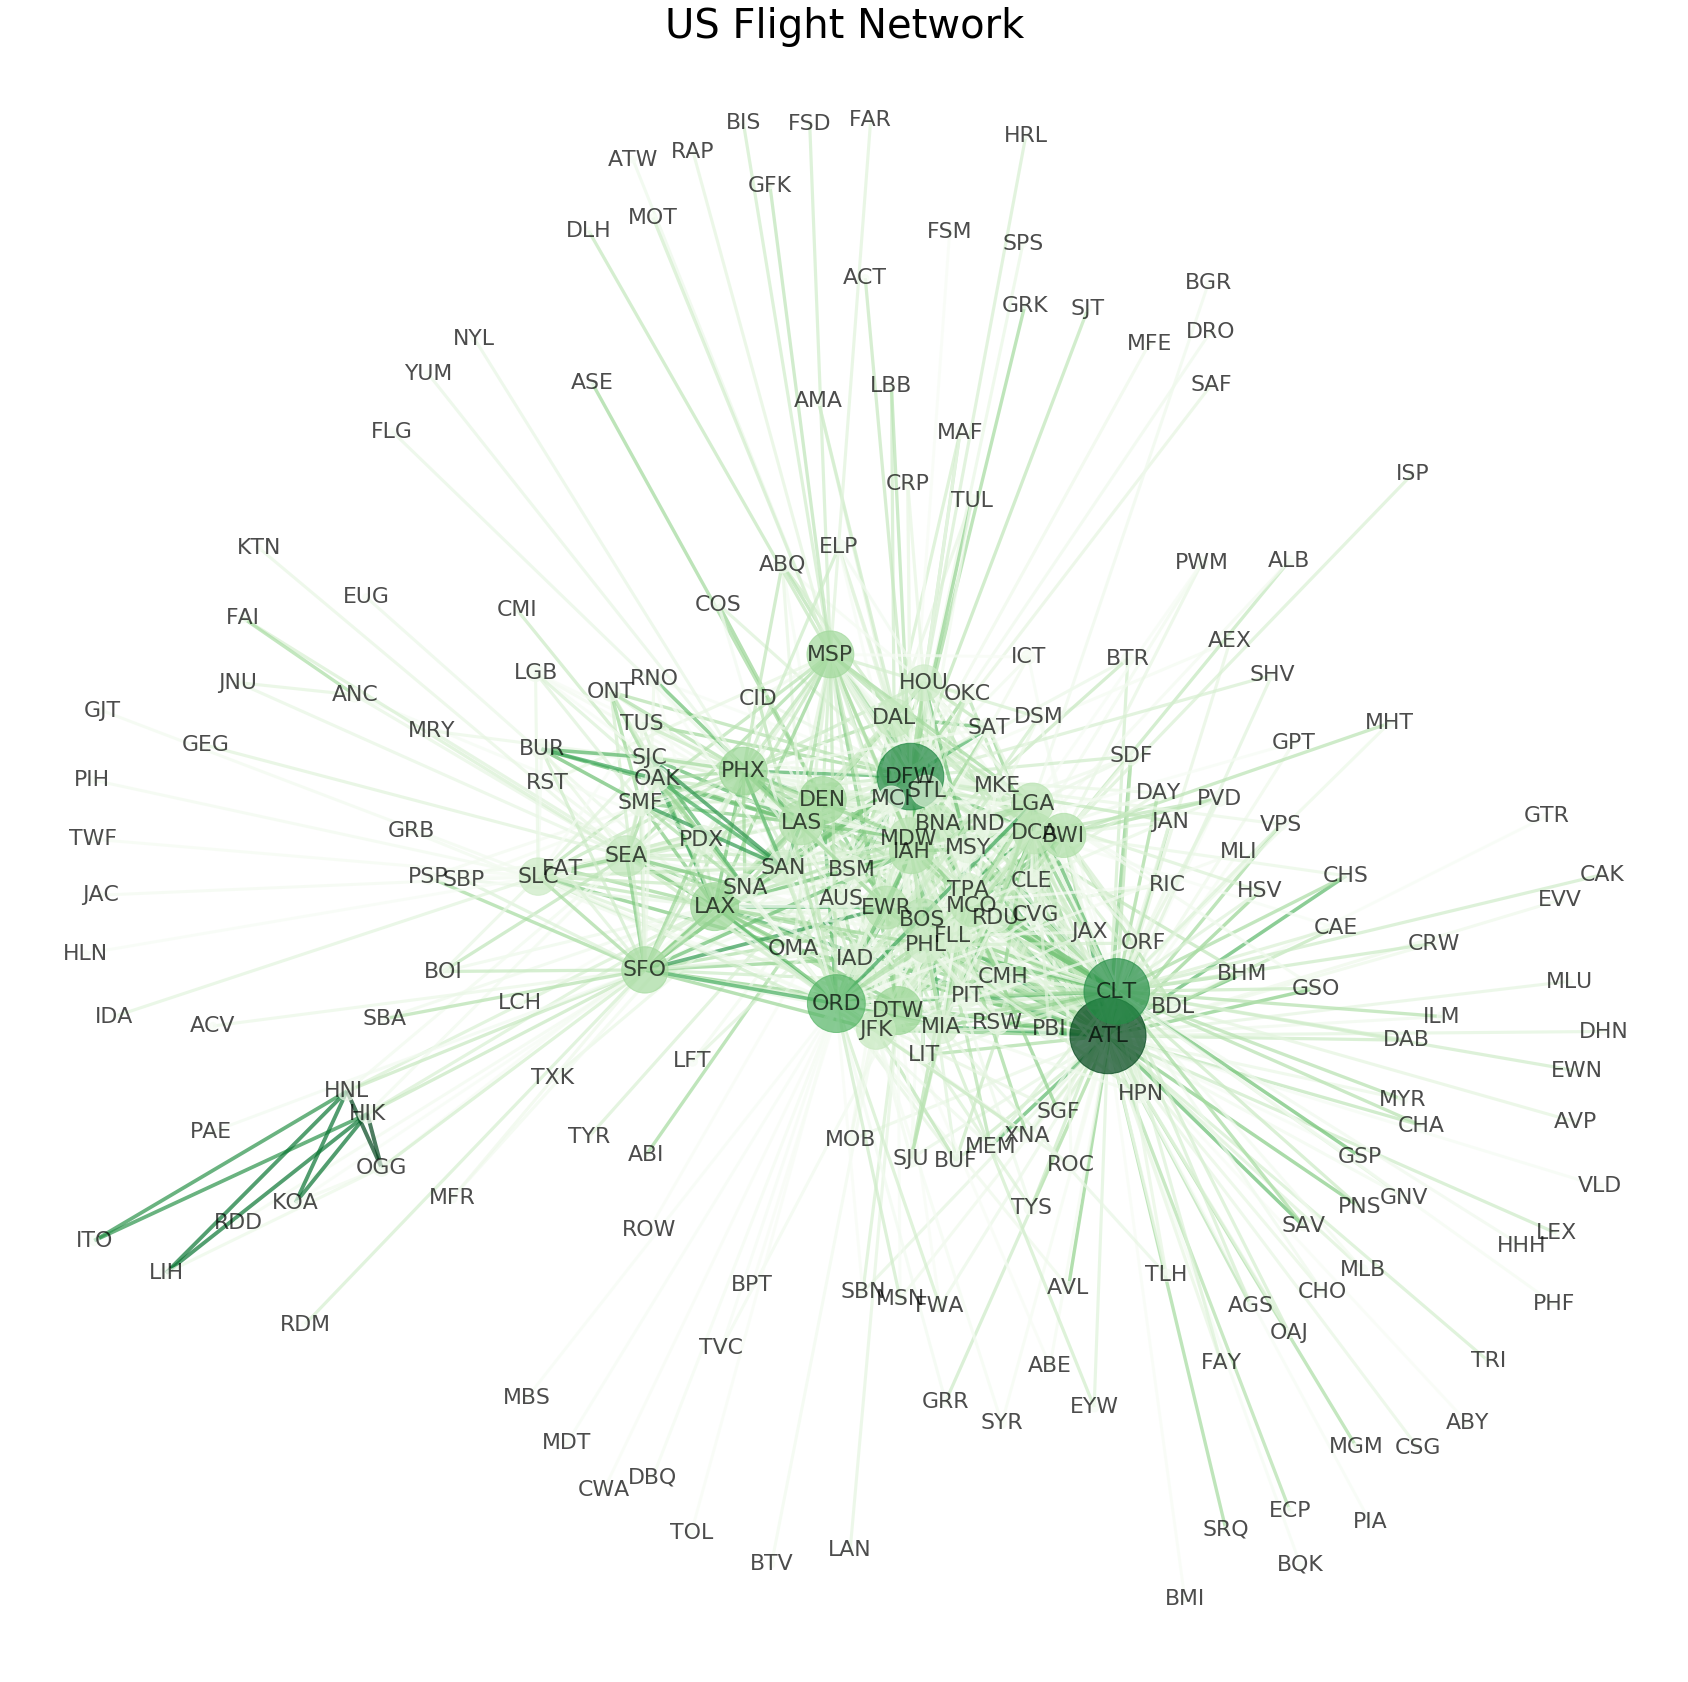

In [50]:
#filter edges with low flight frequency
data_edges_filter = data_edges[data_edges['Freq'] >3]

G = nx.Graph()
plt.figure(figsize=(30,30)) 

for _, edge in data_edges_filter.iterrows():
    G.add_edge(edge['Origin'], edge['Destination'], weight=edge['Freq'])
    
#create a list of weights that we can pass into the draw function 
edges = G.edges()
weights = [G[origin][destination]['weight'] for origin,destination in edges]

#create a list where degrees are the frequency of outbound flights. 
#Scaling the data by 50 to make the size of circles more visible on a plot 
deg = nx.degree(G)
deg = [deg[node] * 50 for node in G.nodes()]

#we can also set transparency of edges and nodes by using alpha 
#and let's add a title
plt.title("US Flight Network", size=40)
nx.draw(G,  edges=edges, width=weights, edge_color=weights, edge_cmap=plt.cm.Greens,  with_labels= True, node_size = deg, 
        cmap=plt.cm.Greens,node_color=deg, font_color = 'black', alpha=0.7, font_size=22)

Interesting, right? We can start seeing some initial insights. Atlanta seems to have the highest number of outbound flights, followed by Dallas and Charlotte. We can kind of determine this by visually assessing the size and color of the circles, but it is difficult to interpret which airport is the most central or well-connected in the network. Thankfully, we have a calculation that can help us do that. We are going to calculate degree centrality. Degree centrality of a node indicates the fraction of nodes it is connected to, which for us means that we can find airports that have the highest number of flight connections to other airports. 

In [12]:
#calculate degree centrality
degrs = [G]
degree_centrality = nx.degree_centrality(degrs[0])
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x:x[1], reverse=True)[0:10]
print(sorted_degree_centrality)

[('ATL', 0.5271966527196652), ('DFW', 0.4476987447698744), ('CLT', 0.3933054393305439), ('ORD', 0.3849372384937238), ('DEN', 0.25523012552301255), ('DTW', 0.25523012552301255), ('IAH', 0.2426778242677824), ('MSP', 0.2426778242677824), ('PHX', 0.23849372384937237), ('LAX', 0.2133891213389121)]


Now we know for sure that the airport with the highest number of connections in the county is Atlanta. Would it make it the busiest airport as well? Maybe so.. Now, what if we wanted to look at all airports Atlanta is connected to? We can filter out our dataset and plot the visualization again. In the below chart I am not changing any plot specific code, simply filtering out the data to Atlanta. 

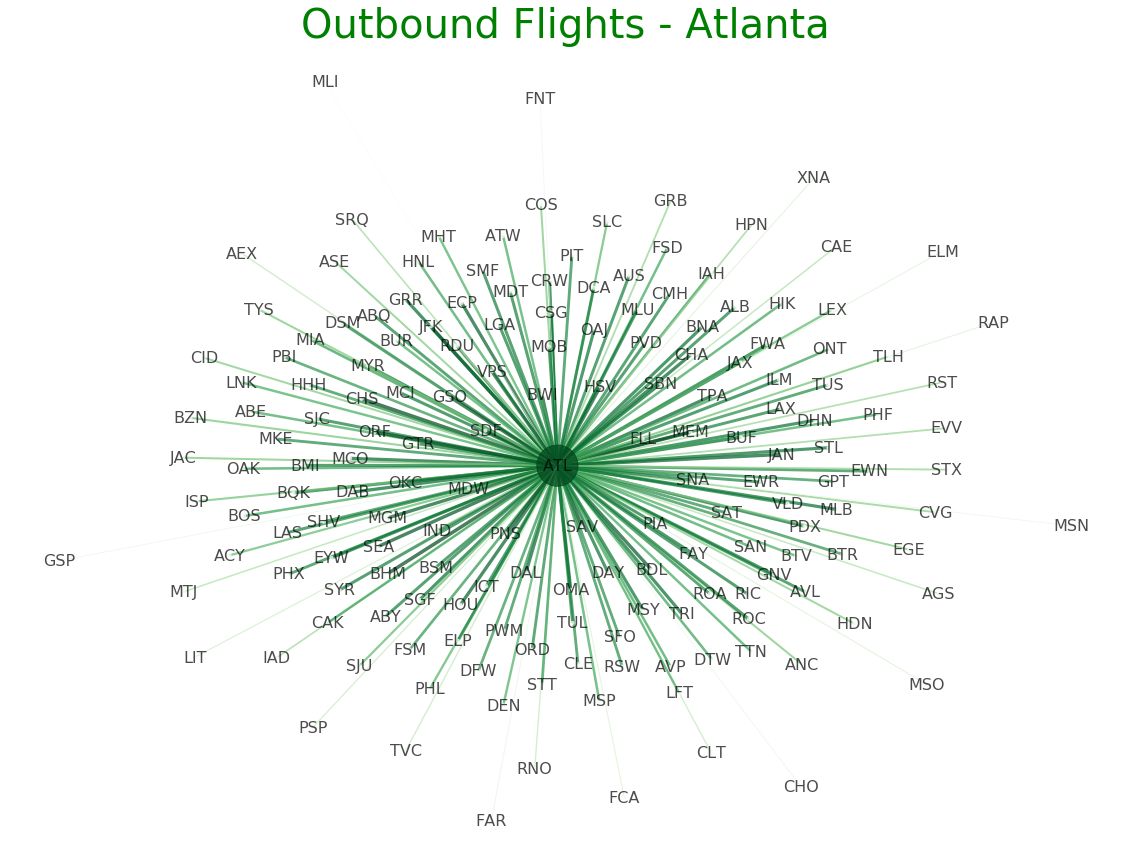

In [51]:
data_edges_filter = data_edges[data_edges['Freq'] >0.5]
data_edges_filter= data_edges_filter[data_edges_filter['Origin'] == 'ATL']

G = nx.Graph()
plt.figure(figsize=(20,15)) 

for _, edge in data_edges_filter.iterrows():
    G.add_edge(edge['Origin'], edge['Destination'], weight=edge['Freq'])
    
edges = G.edges()
weights = [G[origin][destination]['weight'] for origin,destination in edges]

deg = nx.degree(G)
deg = [deg[node] * 10 for node in G.nodes()]

plt.title("Outbound Flights - Atlanta", size=40, color='green')
nx.draw(G,  edges=edges,  width=weights, edge_color=weights, edge_cmap=plt.cm.Greens,  with_labels= True, node_size = deg, 
        cmap=plt.cm.Greens, alpha=0.7, font_size=16,
       node_color=deg, font_color = 'black')

Another interesting fact to point out is that the further airport is from the main node (Atlanta) on the graph, the less frequent the flights are to that airport. For example, I will have more flight options to fly from Atlanta to New York (JFK) than to Montrose (MTJ). 

Lastly, I wanted to show additional potential application of the network visualizations. For example, let's filter only on American Airlines flights and plot again.

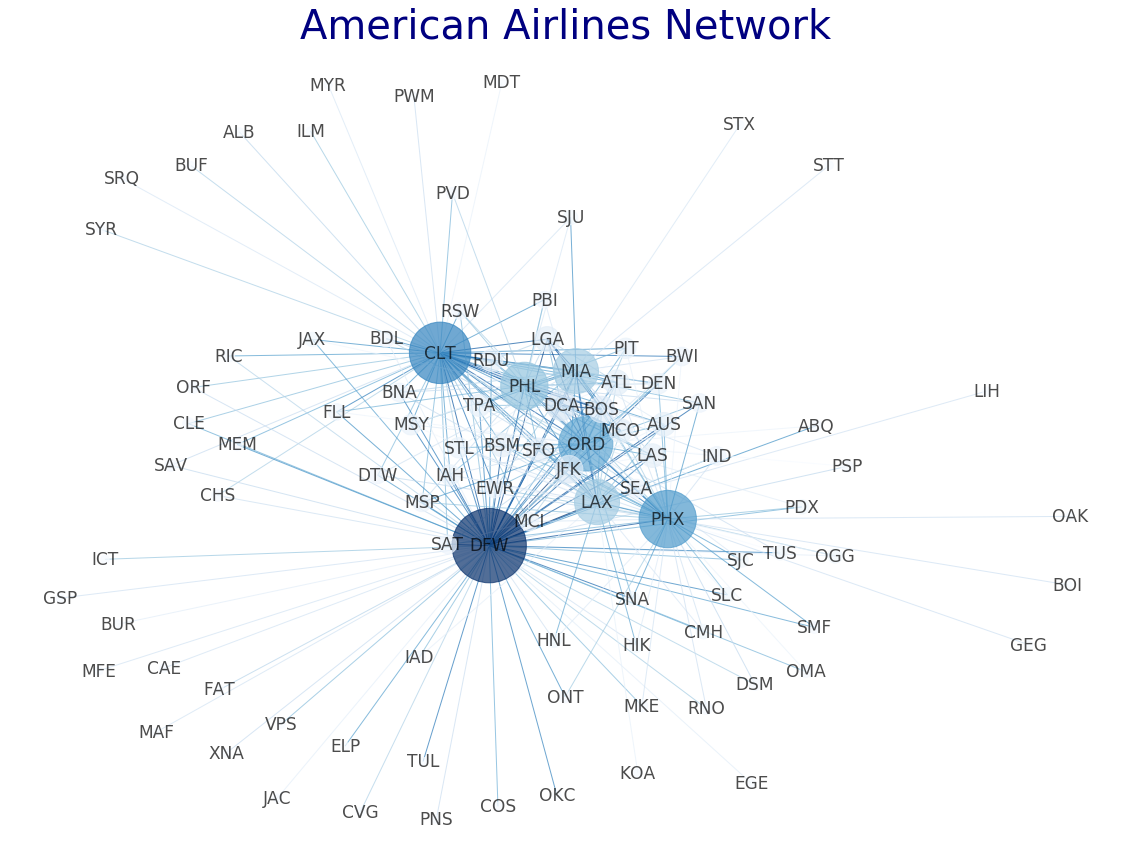

In [44]:
data_edges_filter = data_edges[data_edges['Freq'] >2.6]
data_edges_filter= data_edges_filter[data_edges_filter['Carrier'] == 'AA']

G = nx.Graph()
plt.figure(figsize=(20,15)) 

for _, edge in data_edges_filter.iterrows():
    G.add_edge(edge['Origin'], edge['Destination'], weight=edge['Freq'])
    
edges = G.edges()
weights = [G[origin][destination]['weight'] for origin,destination in edges]

deg = nx.degree(G)
deg = [(deg[node]) * 70 for node in G.nodes()]

plt.title("American Airlines Network", size=40, color='navy')
nx.draw(G,  edges=edges,  width=1, edge_color=weights, edge_cmap=plt.cm.Blues,  with_labels= True, node_size = deg, 
        cmap=plt.cm.Blues, node_color=deg, font_color = 'black',alpha=0.7, font_size=17)

The above plot shows which airports are the main airports in the American Airlines network (have the highest number of outbound flights represented by the size of circles and have the highest number of overall connections to other airports represented by lines on the graph). From an aircraft maintenance perspective, these are the airports that are going to have scheduled aircraft maintenance, spare parts inventory, mechanics on staff, more crew members on call and so on. Understanding of the network can provide better business planning for the airline maintenance, staffing, supply chain, and optimized inventory locations.  